# Loading and visualizing microscopy data
---

This notebook demonstrates the basic usage of `arcadia-microscopy-tools` for loading and visualizing microscopy images from ND2 files.

This page is rendered from a jupyter notebook (`docs/examples/example.ipynb`). When the docs are built, the notebook will be executed and then rendered.

### Imports

First, let's import the necessary libraries:

In [1]:
from pathlib import Path
from pprint import pprint

import matplotlib.pyplot as plt
from arcadia_microscopy_tools import MicroscopyImage

### Loading an ND2 File

The `MicroscopyImage` class provides a convenient `from_nd2_path()` method to load Nikon ND2 files. 

Let's load an example Z-stack image:

In [2]:
# Locate the sample ND2 file in the test data directory
sample_data_directory = Path("../../src/arcadia_microscopy_tools/tests/data")
nd2_path = next(sample_data_directory.glob("*.nd2"))
print("ND2 file:", nd2_path)

# Load the microscopy image
image = MicroscopyImage.from_nd2_path(nd2_path)
image  # Display the image object representation

ND2 file: ../../src/arcadia_microscopy_tools/tests/data/example-zstack.nd2


MicroscopyImage(sizes={'Z': 11, 'Y': 128, 'X': 128}, channels=['FITC'], intensities=[321, 376, 373, ..., 345, 299, 287], dtype=uint16)

### Accessing Metadata

`image.metadata.instrument` returns an `InstrumentMetadata` object with the following fields:

- `sizes` — image dimensions as a dict (e.g. {'X': 128, 'Y': 128, 'Z': 11})
- `channel_metadata_list` — one `ChannelMetadata` entry per channel, each containing:
  - `channel` — channel name, excitation/emission wavelengths, and display color
  - `timestamp` — acquisition datetime
  - `dimensions` — which axes are present (e.g. `Z_STACK`, `MULTICHANNEL`)
  - `resolution` — nominal pixel size in µm and Z/T step sizes
  - `measured` — actual measured axis values (e.g. Z positions in µm)
  - `acquisition` — exposure time, zoom, binning, and scanning settings
  - `optics` — objective magnification, numerical aperture, and name

In [3]:
# Display the full image metadata
pprint(image.metadata.instrument, width=200)

InstrumentMetadata(sizes={'X': 128, 'Y': 128, 'Z': 11},
                   channel_metadata_list=[ChannelMetadata(channel=Channel(name='FITC', excitation_nm=488, emission_nm=512, color=   fitc #07ff00),
                                                          timestamp=datetime.datetime(2025, 3, 7, 14, 38),
                                                          dimensions=<DimensionFlags.Z_STACK: 2>,
                                                          resolution=NominalDimensions(x_size_px=128,
                                                                                       y_size_px=128,
                                                                                       xy_step_um=0.323390342594048,
                                                                                       z_size_px=11,
                                                                                       z_step_um=6.0,
                                                                    

### Visualizing the Image

The image intensities are stored as a numpy array and can be easily visualized using matplotlib. 

For this Z-stack example, we'll display the middle Z-plane:

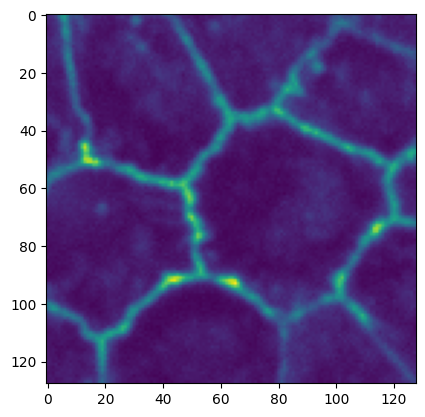

In [4]:
# Extract the central slice of the Z-stack
mid_z = image.sizes["Z"] // 2

# Create a figure and display the central slice of the Z-stack
fig, ax = plt.subplots()
_ = ax.imshow(image.intensities[mid_z])